In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

train_data = pd.read_csv('C:\\Users\\abc\\Anaconda3\\Train_3.csv')
print(train_data.head())

   feature_1  feature_2  feature_3  feature_4  feature_5     target
0   0.293416  -0.945599  -0.421105   0.406816   0.525662 -82.154667
1  -0.836084  -0.189228  -0.776403  -1.053831   0.597997 -48.897960
2   0.236425   0.132836  -0.147723   0.699854  -0.187364  77.270371
3   0.175312   0.143194  -0.581111  -0.122107  -1.292168  -2.988581
4  -1.693011   0.542712  -2.798729  -0.686723   1.244077 -37.596722


In [198]:
train_feature = train_data[['feature_1','feature_2','feature_3','feature_4','feature_5']].values
print(train_feature)
print(train_feature.shape)

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]
(1600, 5)


In [199]:
train_target = train_data[['target']].values
print(train_target)
print(train_target.shape)

[[ -82.15466656]
 [ -48.89796018]
 [  77.2703707 ]
 ...
 [-107.51050797]
 [ -47.34155781]
 [-115.93900296]]
(1600, 1)


In [200]:
X=train_feature #X_train
y=train_target #y_train

#defining a function called hypothesis for the matrix multiplication of theta and the multiple features of the dataset

def hypothesis(theta, X, n): #(array of 5 0s, X array with 1st col=1 + 5 cols, n=5)
    h = np.ones((X.shape[0],1)) #matrix of ones (1600,1)
    theta = theta.reshape(1,n+1) #reshaped matrix of theta
    for i in range(0,X.shape[0]): 
        h[i] = float(np.matmul(theta, X[i])) #performing multiplication
    h = h.reshape(X.shape[0])
    return h

In [201]:
#gradient descent function defined here
#(6 zeros row, 0.0001, 300000, 1600 zeros row, X, y, 5)

def gradient_descent(theta, learn_rate, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    y = y.reshape(1600,)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (learn_rate/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (learn_rate/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [202]:
#performing linear regression by making a function called linear_regression

def linear_regression(X, y, learn_rate, num_iters):   #(X, y,0.0001, 3000)
    n = X.shape[1] #n=5
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1) #initializing the parameter vector
    h = hypothesis(theta, X, n) #hypothesis calculation #(array of 5 0s, X array with 1st col=1 + 5 cols, n=5)
    theta, cost = gradient_descent(theta,learn_rate,num_iters,h,X,y,n) #returning the optimized parameters by Gradient Descent
    return theta, cost

In [203]:
mean = np.ones(X.shape[1])
std = np.ones(X.shape[1])
for i in range(0, X.shape[1]):
    mean[i] = np.mean(X.transpose()[i])
    std[i] = np.std(X.transpose()[i])
    for j in range(0, X.shape[0]):
        X[j][i] = (X[j][i] - mean[i])/std[i]

In [204]:
mean

array([ 0.0041143 , -0.0276038 , -0.04445943, -0.04240792,  0.01200535])

In [205]:
std

array([0.99702582, 1.02145636, 1.01145129, 1.01687155, 0.97834768])

In [206]:
theta, cost = linear_regression(X,y,0.001,30000)

In [207]:
print(theta)

[[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]]


In [208]:
test_data = pd.read_csv('C:\\Users\\abc\\Anaconda3\\Test_3.csv')
test_values = test_data.values
print(test_values)

[[ 2.19276453e-01 -1.50092270e+00  4.50940838e-01  9.00056180e-01
  -2.33720247e-01 -9.44663008e+01]
 [-9.38644372e-01 -6.41440929e-01  7.58345045e-01  1.43067514e+00
  -1.04178346e+00 -2.47689833e+01]
 [ 7.22543566e-01 -1.13177602e-01 -6.99672763e-02 -1.82374980e+00
   3.25823707e-01 -3.98528103e+01]
 ...
 [-2.51352937e-01 -1.23113076e+00 -1.69452370e-01  1.11946897e+00
   2.15639592e+00 -6.90734391e+01]
 [ 2.82031084e-01  7.36082802e-01 -4.56391298e-01  7.60166092e-01
   5.85222535e-01  9.28014358e+01]
 [-1.38649009e-02 -1.03812765e+00 -1.08653567e+00 -4.70817513e-01
   1.59466764e-01 -1.21587213e+02]]


In [209]:
X_test = test_data.drop('target', axis=1)

In [210]:
b = X_test.values
b = b.reshape(5,400)
print(b)
a = theta[:,0:5]
print (a)

[[ 0.21927645 -1.5009227   0.45094084 ... -0.57724732 -0.13532242
   0.15871026]
 [-0.82658058 -0.26922801 -0.01631519 ... -0.45858937 -0.57518999
  -0.04164595]
 [ 0.75438983 -0.90794557  1.05867483 ...  0.92676403  0.26920183
   0.45211349]
 [ 0.75216124 -0.44355522 -0.2571625  ...  0.05543749 -0.53426066
   0.24324266]
 [ 1.15485673  0.43815459  0.2909103  ... -1.08653567 -0.47081751
   0.15946676]]
[[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635]]


In [211]:
y_test = np.dot(a, b)
print(y_test)

[[ 105.88420226  -78.1524789   110.95450994   96.03155688 -168.26261918
   205.98942351  -17.90322522 -175.9237971   306.1237707   -52.8027178
   -86.6248629    34.29047503 -115.22835081 -151.37880207   54.87101284
    88.64597098   92.67870527   81.25115097  -19.05438379 -120.58480522
   -33.99090802    4.40905491 -288.76883992   37.80470331  219.93041843
   -93.3479316    45.97166299 -156.01723628 -117.2457007    21.85086818
    38.23991866  329.09235119  -43.32634243   19.60303221   64.00560536
   172.54717485 -124.47767404  195.83502329   87.66913149  -29.70513468
   -88.60984519  -31.24425376   61.86047754 -120.12781411 -161.96598372
   109.51035738   74.24911428  -49.23071383   24.0258414   -23.24332314
    50.53624244 -121.88179199  -83.767219   -146.90215491 -156.35890882
   -80.71585893  -77.29077705  -22.74802942 -102.2088048    92.30186947
   -72.90673224    8.94793321   72.28083255   52.65676956  -27.73010028
   -72.531296    298.93814874   18.1889181   -36.20236281 -134.68

In [212]:
y = test_data['target']
print(y.values)

[-9.44663008e+01 -2.47689833e+01 -3.98528103e+01 -2.26279598e+02
 -5.50253044e+01 -2.02056395e+02 -1.84007599e+02  2.79620583e-03
 -3.04686920e+00 -1.40452109e+01  1.34307302e+02  3.84322797e+01
  1.76654940e+02 -1.06203401e+02  5.67055151e+01  3.82439213e+01
  1.21564194e+02  1.10179363e+02  2.66755810e+01  2.39380938e+01
  5.42799182e+01  4.95930587e+01  7.65845148e+01 -6.44481370e+01
  1.22783128e+02  5.30859692e+00 -2.56279719e+01  1.27048959e+02
 -3.55931263e+01  1.00110654e+02  3.35821292e+01 -2.52568879e+00
 -1.31008816e+02 -1.05277613e+02 -6.20927567e+01 -5.00598725e+01
 -4.00281512e+01  7.62881195e+01 -1.18352086e+02  2.87105573e+01
  1.81903414e+02 -5.99392350e+01 -1.17181577e+02  4.57919483e+01
 -5.44162980e+01  1.03566183e+02  1.14566467e+02  1.14920956e+02
 -2.23147792e+01 -1.00904288e+02 -3.62242255e+01  2.26194210e+02
  2.74820440e+01  1.65163691e+02 -1.63431480e+02 -1.70552300e+02
  5.82355776e+01 -1.29717701e+02 -2.56052533e+01  4.91441997e+01
 -7.99329604e+01 -2.26009

Text(0, 0.5, 'Cost')

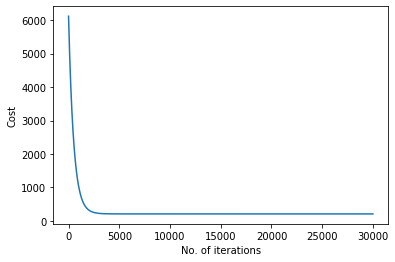

In [218]:
cost = list(cost)
n_iterations = [x for x in range(0,30000)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [214]:
sc = y_test.reshape(400,) - y.values
print(sc)

[ 200.35050303  -53.3834956   150.80732024  322.31115467 -113.23731479
  408.04581845  166.10437388 -175.92659331  309.1706399   -38.75750695
 -220.93216493   -4.14180472 -291.88329072  -45.17540107   -1.83450224
   50.40204969  -28.88548875  -28.92821215  -45.72996483 -144.52289906
  -88.27082621  -45.18400381 -365.35335475  102.25284032   97.14729053
  -98.65652852   71.59963486 -283.06619491  -81.65257437  -78.25978568
    4.65778951  331.61803999   87.6824735   124.88064527  126.09836205
  222.60704736  -84.44952279  119.54690377  206.02121717  -58.41569194
 -270.51325907   28.69498119  179.0420543  -165.91976246 -107.54968567
    5.94417461  -40.31735259 -164.15166937   46.34062057   77.66096458
   86.76046794 -348.07600198 -111.24926302 -312.06584592    7.0725709
   89.83644142 -135.52635463  106.9696716   -76.60355153   43.15766973
    7.02622815   31.54884434  126.78846683   32.43615433 -139.80229231
   16.78076969  140.89395301   47.30421706  150.02296775 -341.09656454
  106.9

In [215]:
sc = y.values - y_test.reshape(400,)

In [216]:
print (sc)

[-200.35050303   53.3834956  -150.80732024 -322.31115467  113.23731479
 -408.04581845 -166.10437388  175.92659331 -309.1706399    38.75750695
  220.93216493    4.14180472  291.88329072   45.17540107    1.83450224
  -50.40204969   28.88548875   28.92821215   45.72996483  144.52289906
   88.27082621   45.18400381  365.35335475 -102.25284032  -97.14729053
   98.65652852  -71.59963486  283.06619491   81.65257437   78.25978568
   -4.65778951 -331.61803999  -87.6824735  -124.88064527 -126.09836205
 -222.60704736   84.44952279 -119.54690377 -206.02121717   58.41569194
  270.51325907  -28.69498119 -179.0420543   165.91976246  107.54968567
   -5.94417461   40.31735259  164.15166937  -46.34062057  -77.66096458
  -86.76046794  348.07600198  111.24926302  312.06584592   -7.0725709
  -89.83644142  135.52635463 -106.9696716    76.60355153  -43.15766973
   -7.02622815  -31.54884434 -126.78846683  -32.43615433  139.80229231
  -16.78076969 -140.89395301  -47.30421706 -150.02296775  341.09656454
 -106.9